In [1]:
import os
import pandas as pd
from IPython.display import display

In [2]:
print(os.getcwd())

/Users/jadechoi/Desktop/Majorana-Neutrino-Hunt/extracted_features_csv_files


In [3]:
ls

combine_everyone.ipynb  eunice_csv_files/       labels_train.csv
combined_csv_files/     jade_csv_files/         nomin_csv_files/
description.txt         labels_test.csv         prithvi_csv_files/


In [4]:
def process_and_merge_features(
    labels_path: str,
    eunice_path: str,
    nomin_path: str,
    prithvi_path: str,
    jade_path: str,
    output_filename: str,
    output_dir: str = "combined_csv_files",
) -> pd.DataFrame:
    """
    Loads feature CSVs from different sources, applies specific preprocessing 
    (specifically to Jade's IDs), merges them with labels, and saves the result.
    """
    
    # Load Data
    print("=" * 50)
    print("Loading Files...")
    print("=" * 50)
    
    try:
        labels = pd.read_csv(labels_path)
        e = pd.read_csv(eunice_path)
        n = pd.read_csv(nomin_path)
        p = pd.read_csv(prithvi_path)
        j = pd.read_csv(jade_path)
    except FileNotFoundError as err:
        print(f"Error loading files: {err}")
        return None

    # Fix Jade IDs (Specific Logic)
    # print("Preprocessing Jade IDs...")
    # g = j["id"].str.replace("id_train_", "", regex=False).astype(int)
    # file_idx = (g // 65000).astype(int)
    # j["id"] = g.astype(str) + "_train_" + file_idx.astype(str)
    
    # Fix Jade IDs only if they are in the broken train format
    #jid = j["id"].astype(str)

    #needs_fix = jid.str.startswith("id_train_")
    #if needs_fix.any():
        #g = jid.loc[needs_fix].str.replace("id_train_", "", regex=False).astype(int)
        #file_idx = (g // 65000).astype(int)
        #j.loc[needs_fix, "id"] = g.astype(str) + "_train_" + file_idx.astype(str)

    #print("Jade IDs fixed:", int(needs_fix.sum()))


    # Preview Data    
    data_map = {
        "Labels": labels,
        "Eunice": e,
        "Nomin": n,
        "Prithvi": p,
        "Jade": j
    }

    for name, df in data_map.items():
        print(f"\n{name} — File Shape: {df.shape}")
        display(df.head())

    # Merge
    print("\n" + "=" * 50)
    print("Merging Datasets...")
    
    merged = (
        labels
        .merge(e, on="id", how="inner")
        .merge(n, on="id", how="inner")
        .merge(p, on="id", how="inner")
        .merge(j, on="id", how="inner")
    )

    print(f"Final Merged Shape: {merged.shape}")

    # Save Output
    os.makedirs(output_dir, exist_ok=True)
    out_path = os.path.join(output_dir, output_filename)
    
    print(f"Saving to {out_path}...")
    merged.to_csv(out_path, index=False, compression="gzip")
    print("Save Complete.")

    return merged

## Combine Training Files

In [5]:
paths_train = {
    "labels_path": "labels_train.csv",
    "eunice_path": "eunice_csv_files/train_csv/train_all_features.csv.gz",
    "nomin_path": "nomin_csv_files/combined_train_n.csv.gz",
    "prithvi_path": "prithvi_csv_files/train_2.csv.gz",
    "jade_path": "jade_csv_files/train_jade_features.csv"
}

merged_df_train = process_and_merge_features(
    **paths_train,
    output_filename="combined_train_with_labels.csv.gz")

merged_df_train.head()

Loading Files...

Labels — File Shape: (1040000, 7)


,id,energy_label,psd_label_low_avse,psd_label_high_avse,psd_label_dcr,psd_label_lq,tp0
0,0_train_0,582.364295,False,True,True,True,957
1,1_train_0,250.159995,False,True,True,True,948
2,2_train_0,1212.323954,False,True,False,True,965
3,3_train_0,240.878110,False,True,True,False,927
4,4_train_0,285.124189,False,True,True,False,958



Eunice — File Shape: (1040000, 7)


,id,ED,HWP,LQ80,PPR,SCA,ND80
0,0_train_0,3409.0,2120.0,-635333.796311,0.699672,0.034655,0.0
1,1_train_0,3404.0,2004.0,-289756.893085,0.687174,0.035314,0.0
2,2_train_0,3411.0,2125.0,-379843.029134,0.700985,0.034915,0.0
3,3_train_0,3408.0,2098.0,-252673.626844,0.697850,0.034752,0.0
4,4_train_0,3406.0,2037.0,-317761.453582,0.690585,0.035132,0.0



Nomin — File Shape: (1040000, 10)


,id,current_skewness,tail_slope_no_pz,spectral_centroid_power,current_kurtosis,tail_slope,total_power,time_to_main_peak,time_to_peak,current_width
0,0_train_0,3.138621,-10097.252452,107.276207,9.373445,1.975741,9.232819,85,85,0.126727
1,1_train_0,3.104545,-9398.326178,108.213621,8.950671,-1.501815,8.475871,87,87,0.136277
2,2_train_0,2.122413,-10322.700267,105.735183,3.296724,-3.050903,8.795490,95,95,0.236836
3,3_train_0,2.793886,-8370.010321,107.946935,6.655448,-1.657508,8.448951,116,116,0.171464
4,4_train_0,2.269455,-9623.731683,106.350372,3.838895,-3.879321,8.589440,94,94,0.225977



Prithvi — File Shape: (1040000, 8)


,id,tdrift10,tdrift50,tdrift99,tfr,peak_count,gbn,bpr
0,0_train_0,32.0,65.0,85.0,0.142357,3,1.198436,0.059642
1,1_train_0,0.0,60.0,87.0,0.151160,3,1.381123,0.061975
2,2_train_0,35.0,67.0,95.0,0.142606,3,1.361857,0.050813
3,3_train_0,0.0,90.0,116.0,0.133192,2,1.165654,0.062954
4,4_train_0,0.0,61.0,94.0,0.145504,7,1.390918,0.055013



Jade — File Shape: (1040000, 5)


,id,AvsE,GradAreaRatio,GradWidthMain,HFER
0,0_train_0,0.519805,1.0,76.0,0.034772
1,1_train_0,0.531775,1.0,46.0,0.037621
2,2_train_0,0.343676,1.0,90.0,0.035552
3,3_train_0,0.483144,1.0,56.0,0.035093
4,4_train_0,0.377738,1.0,53.0,0.035971



Merging Datasets...
Final Merged Shape: (1040000, 33)
Saving to combined_csv_files/combined_train_with_labels.csv.gz...
Save Complete.


,id,energy_label,psd_label_low_avse,psd_label_high_avse,psd_label_dcr,psd_label_lq,tp0,ED,HWP,LQ80,...,tdrift50,tdrift99,tfr,peak_count,gbn,bpr,AvsE,GradAreaRatio,GradWidthMain,HFER
0,0_train_0,582.364295,False,True,True,True,957,3409.0,2120.0,-635333.796311,...,65.0,85.0,0.142357,3,1.198436,0.059642,0.519805,1.0,76.0,0.034772
1,1_train_0,250.159995,False,True,True,True,948,3404.0,2004.0,-289756.893085,...,60.0,87.0,0.151160,3,1.381123,0.061975,0.531775,1.0,46.0,0.037621
2,2_train_0,1212.323954,False,True,False,True,965,3411.0,2125.0,-379843.029134,...,67.0,95.0,0.142606,3,1.361857,0.050813,0.343676,1.0,90.0,0.035552
3,3_train_0,240.878110,False,True,True,False,927,3408.0,2098.0,-252673.626844,...,90.0,116.0,0.133192,2,1.165654,0.062954,0.483144,1.0,56.0,0.035093
4,4_train_0,285.124189,False,True,True,False,958,3406.0,2037.0,-317761.453582,...,61.0,94.0,0.145504,7,1.390918,0.055013,0.377738,1.0,53.0,0.035971


In [6]:
df_train = pd.read_csv('combined_csv_files/combined_train_with_labels.csv.gz')
df_train

,id,energy_label,psd_label_low_avse,psd_label_high_avse,psd_label_dcr,psd_label_lq,tp0,ED,HWP,LQ80,...,tdrift50,tdrift99,tfr,peak_count,gbn,bpr,AvsE,GradAreaRatio,GradWidthMain,HFER
0,0_train_0,582.364295,False,True,True,True,957,3409.0,2120.0,-635333.796311,...,65.0,85.0,0.142357,3,1.198436,0.059642,0.519805,1.000000,76.0,0.034772
1,1_train_0,250.159995,False,True,True,True,948,3404.0,2004.0,-289756.893085,...,60.0,87.0,0.151160,3,1.381123,0.061975,0.531775,1.000000,46.0,0.037621
2,2_train_0,1212.323954,False,True,False,True,965,3411.0,2125.0,-379843.029134,...,67.0,95.0,0.142606,3,1.361857,0.050813,0.343676,1.000000,90.0,0.035552
3,3_train_0,240.878110,False,True,True,False,927,3408.0,2098.0,-252673.626844,...,90.0,116.0,0.133192,2,1.165654,0.062954,0.483144,1.000000,56.0,0.035093
4,4_train_0,285.124189,False,True,True,False,958,3406.0,2037.0,-317761.453582,...,61.0,94.0,0.145504,7,1.390918,0.055013,0.377738,1.000000,53.0,0.035971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039995,1039995_train_15,210.834626,True,True,True,True,949,3403.0,2048.0,-240759.341995,...,55.0,90.0,0.151747,6,1.008092,0.062825,0.573645,33.442724,69.0,0.035228
1039996,1039996_train_15,380.170340,True,True,True,True,949,3404.0,2045.0,-417622.302428,...,57.0,79.0,0.150305,3,1.245492,0.062706,0.564955,58.862967,71.0,0.034669
1039997,1039997_train_15,370.109563,False,True,True,True,947,3409.0,2063.0,-407730.168602,...,77.0,102.0,0.142950,2,1.149456,0.062153,0.473789,143.746154,79.0,0.034553
1039998,1039998_train_15,98.258524,True,True,True,False,921,3400.0,2001.0,-116570.568893,...,71.0,92.0,0.153135,5,1.192639,0.065264,0.572606,1.000000,42.0,0.039377


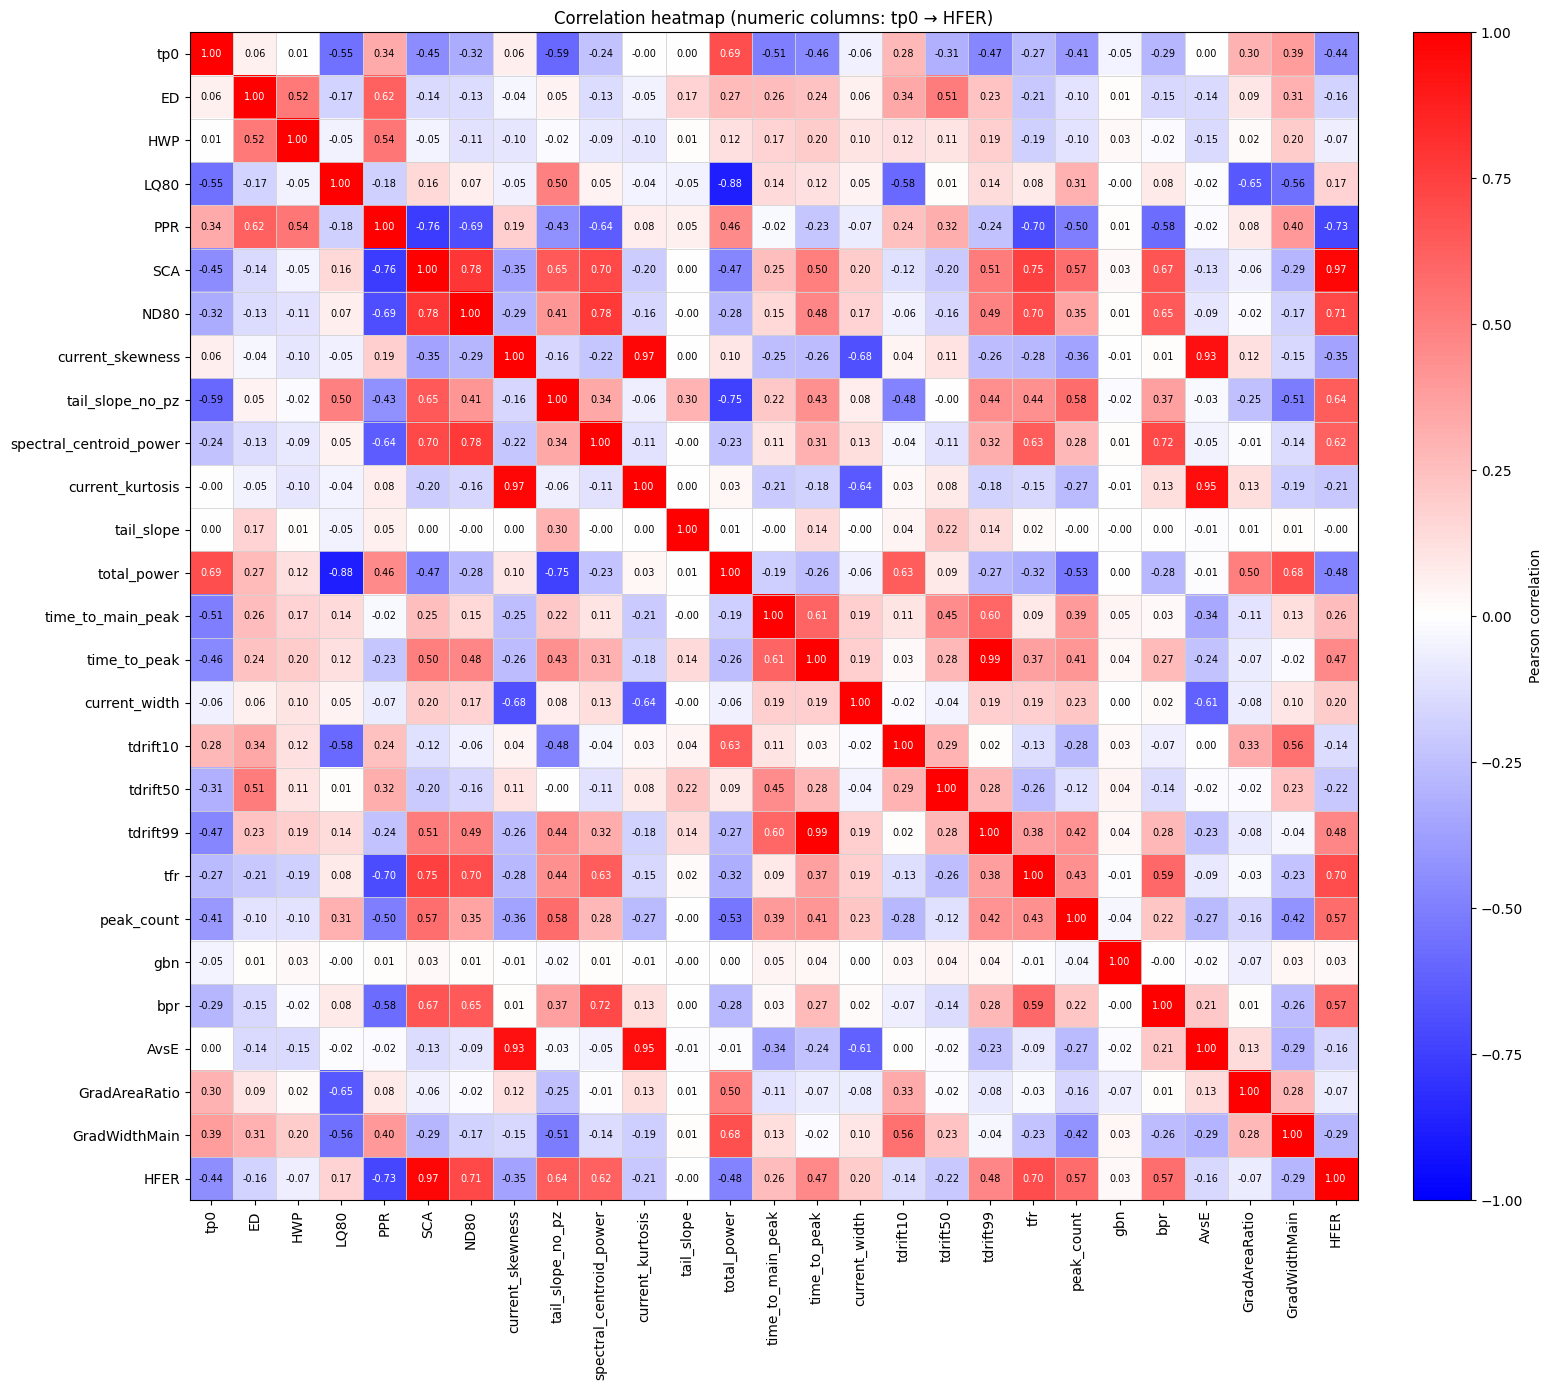

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# numeric columns from tp0 to HFER
cols = df_train.loc[:, "tp0":"HFER"].columns
num_df = df_train.loc[:, cols].select_dtypes(include="number")

corr = num_df.corr(method="pearson")

# smoother diverging cmap: blue(-1) -> white(0) -> red(+1)
cmap = LinearSegmentedColormap.from_list(
    "blue_white_red",
    [(0.0, "blue"), (0.5, "white"), (1.0, "red")],
    N=256  # smooth gradient
)

n = corr.shape[0]
fig, ax = plt.subplots(figsize=(16, 14))

# keep boxes crisp: no smoothing/interpolation
im = ax.imshow(corr.values, cmap=cmap, vmin=-1, vmax=1, interpolation="nearest")

# draw clear box borders
ax.set_xticks(np.arange(-0.5, n, 1), minor=True)
ax.set_yticks(np.arange(-0.5, n, 1), minor=True)
ax.grid(which="minor", color="lightgray", linestyle="-", linewidth=0.6)
ax.tick_params(which="minor", bottom=False, left=False)

# ticks/labels
ax.set_xticks(np.arange(n))
ax.set_yticks(np.arange(n))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.index)

cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Pearson correlation")
cbar.set_ticks(np.linspace(-1, 1, 9))

ax.set_title("Correlation heatmap (numeric columns: tp0 → HFER)")

# numbers in each cell
vals = corr.values
for i in range(n):
    for j in range(n):
        v = vals[i, j]
        ax.text(
            j, i, f"{v:.2f}",
            ha="center", va="center",
            fontsize=7,
            color=("black" if abs(v) < 0.6 else "white")
        )

fig.tight_layout()
plt.show()


In [11]:
df_train.describe()

,energy_label,tp0,ED,HWP,LQ80,PPR,SCA,ND80,current_skewness,tail_slope_no_pz,...,tdrift50,tdrift99,tfr,peak_count,gbn,bpr,AvsE,GradAreaRatio,GradWidthMain,HFER
count,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,...,1.039995e+06,1.039995e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06
mean,6.381633e+02,9.516434e+02,3.406036e+03,2.054120e+03,-6.978950e+05,6.895844e-01,3.572992e-02,3.009126e-03,2.956637e+00,-9.783858e+03,...,6.981389e+01,1.131437e+02,1.495163e-01,5.104236e+00,1.777303e+00,6.049704e-02,4.964875e-01,4.091337e+11,6.792718e+01,3.643588e-02
std,6.704271e+02,1.895332e+01,7.735526e+00,1.296720e+02,7.301064e+05,2.072402e-02,6.330801e-03,4.127131e-02,5.088982e-01,1.268292e+03,...,2.934827e+01,7.287391e+01,3.987192e-02,7.352031e+00,1.174284e+00,2.152323e-02,9.173632e-02,1.401446e+12,2.442059e+01,8.420477e-03
min,0.000000e+00,7.100000e+01,3.074000e+03,7.200000e+01,-5.846630e+06,1.672960e-01,2.676319e-02,0.000000e+00,-1.364742e+00,-1.400795e+05,...,0.000000e+00,9.000000e+00,1.968922e-02,1.000000e+00,6.992497e-01,3.636530e-02,3.150645e-02,1.000000e+00,5.000000e+00,2.650746e-02
25%,2.383612e+02,9.420000e+02,3.404000e+03,2.032000e+03,-6.984126e+05,6.884366e-01,3.452545e-02,0.000000e+00,2.665699e+00,-1.051588e+04,...,5.400000e+01,8.600000e+01,1.408390e-01,1.000000e+00,1.116426e+00,5.533778e-02,4.353313e-01,1.000000e+00,5.100000e+01,3.454584e-02
50%,3.411866e+02,9.540000e+02,3.407000e+03,2.066000e+03,-3.769554e+05,6.934395e-01,3.480813e-02,0.000000e+00,3.158948e+00,-9.965724e+03,...,6.900000e+01,1.020000e+02,1.457415e-01,2.000000e+00,1.321930e+00,6.133205e-02,5.268103e-01,1.000000e+00,6.500000e+01,3.505329e-02
75%,6.300128e+02,9.640000e+02,3.410000e+03,2.099000e+03,-2.654720e+05,6.974714e-01,3.524030e-02,0.000000e+00,3.314185e+00,-9.329837e+03,...,8.300000e+01,1.210000e+02,1.509235e-01,5.000000e+00,1.908089e+00,6.423424e-02,5.653386e-01,6.588437e+01,8.200000e+01,3.580735e-02
max,4.998508e+03,1.352000e+03,3.790000e+03,3.796000e+03,3.675492e+07,9.741713e-01,2.028693e-01,2.193201e+00,5.955492e+00,5.081424e+04,...,2.839000e+03,2.919000e+03,3.990051e+00,5.500000e+01,3.667323e+01,2.569411e+00,9.706884e-01,7.968905e+12,3.910000e+02,2.743541e-01


## Combine Test Files

In [16]:
paths_test = {
    "labels_path": "labels_test.csv",
    "eunice_path": "eunice_csv_files/test_csv/test_all_features.csv.gz",
    "nomin_path": "nomin_csv_files/combined_test_n.csv.gz",
    "prithvi_path": "prithvi_csv_files/test_2.csv.gz",
    "jade_path": "jade_csv_files/test_jade_features.csv"
}

merged_df_test = process_and_merge_features(
    **paths_test,
    output_filename="combined_test_with_labels.csv.gz")

merged_df_test.head()

Loading Files...
Jade IDs fixed: 0

Labels — File Shape: (390000, 7)


,id,energy_label,psd_label_low_avse,psd_label_high_avse,psd_label_dcr,psd_label_lq,tp0
0,2395098_test_0,1167.174731,True,True,True,True,967
1,2395099_test_0,870.765543,False,True,True,False,960
2,2395100_test_0,582.980526,False,True,True,True,960
3,2395101_test_0,238.918902,True,True,True,True,930
4,2395102_test_0,214.491195,False,True,True,True,924



Eunice — File Shape: (390000, 7)


,id,ED,HWP,LQ80,PPR,SCA,ND80
0,2395098_test_0,3407.0,2036.0,-1.300536e+06,0.692435,0.034359,0.0
1,2395099_test_0,3405.0,2019.0,-9.729822e+05,0.690517,0.034267,0.0
2,2395100_test_0,3412.0,2107.0,-6.390870e+05,0.700524,0.034659,0.0
3,2395101_test_0,3408.0,2053.0,-2.760460e+05,0.690450,0.034947,0.0
4,2395102_test_0,3406.0,1939.0,-7.611188e+04,0.677887,0.040895,0.0



Nomin — File Shape: (390000, 10)


,id,total_power,tail_slope,time_to_main_peak,current_skewness,tail_slope_no_pz,current_kurtosis,time_to_peak,spectral_centroid_power,current_width
0,2395098_test_0,9.818632,-0.841532,77,3.257910,-10545.834394,10.122620,77,108.796954,0.122269
1,2395099_test_0,9.556397,32.147544,99,3.377049,-10647.558850,10.875182,99,110.305348,0.118442
2,2395100_test_0,9.232249,0.558690,100,2.662094,-10110.162247,6.156408,100,108.213213,0.171536
3,2395101_test_0,8.453703,-5.024905,110,3.407008,-9936.410284,11.064097,110,109.196803,0.116946
4,2395102_test_0,7.291795,-1.082581,135,2.489377,-8275.481025,5.544923,135,109.163049,0.163692



Prithvi — File Shape: (390000, 8)


,id,tdrift10,tdrift50,tdrift99,tfr,peak_count,gbn,bpr
0,2395098_test_0,34.0,55.0,76.0,0.148591,1,1.282821,0.062497
1,2395099_test_0,45.0,70.0,90.0,0.147334,1,1.203640,0.063886
2,2395100_test_0,40.0,76.0,100.0,0.139090,2,1.189320,0.057715
3,2395101_test_0,38.0,88.0,110.0,0.138597,2,1.226275,0.067184
4,2395102_test_0,0.0,83.0,135.0,0.149185,13,1.203153,0.055602



Jade — File Shape: (390000, 5)


,id,AvsE,GradAreaRatio,GradWidthMain,HFER
0,2395098_test_0,0.553581,2.257453e+02,69.0,0.034373
1,2395099_test_0,0.573090,2.120524e+12,88.0,0.034307
2,2395100_test_0,0.443685,1.784824e+02,84.0,0.034885
3,2395101_test_0,0.583046,1.000000e+00,53.0,0.035474
4,2395102_test_0,0.403248,1.000000e+00,46.0,0.051582



Merging Datasets...
Final Merged Shape: (390000, 33)
Saving to combined_csv_files\combined_test_with_labels.csv.gz...
Save Complete.


,id,energy_label,psd_label_low_avse,psd_label_high_avse,psd_label_dcr,psd_label_lq,tp0,ED,HWP,LQ80,...,tdrift50,tdrift99,tfr,peak_count,gbn,bpr,AvsE,GradAreaRatio,GradWidthMain,HFER
0,2395098_test_0,1167.174731,True,True,True,True,967,3407.0,2036.0,-1.300536e+06,...,55.0,76.0,0.148591,1,1.282821,0.062497,0.553581,2.257453e+02,69.0,0.034373
1,2395099_test_0,870.765543,False,True,True,False,960,3405.0,2019.0,-9.729822e+05,...,70.0,90.0,0.147334,1,1.203640,0.063886,0.573090,2.120524e+12,88.0,0.034307
2,2395100_test_0,582.980526,False,True,True,True,960,3412.0,2107.0,-6.390870e+05,...,76.0,100.0,0.139090,2,1.189320,0.057715,0.443685,1.784824e+02,84.0,0.034885
3,2395101_test_0,238.918902,True,True,True,True,930,3408.0,2053.0,-2.760460e+05,...,88.0,110.0,0.138597,2,1.226275,0.067184,0.583046,1.000000e+00,53.0,0.035474
4,2395102_test_0,214.491195,False,True,True,True,924,3406.0,1939.0,-7.611188e+04,...,83.0,135.0,0.149185,13,1.203153,0.055602,0.403248,1.000000e+00,46.0,0.051582


In [17]:
df_test = pd.read_csv('combined_csv_files/combined_test_with_labels.csv.gz')
df_test

,id,energy_label,psd_label_low_avse,psd_label_high_avse,psd_label_dcr,psd_label_lq,tp0,ED,HWP,LQ80,...,tdrift50,tdrift99,tfr,peak_count,gbn,bpr,AvsE,GradAreaRatio,GradWidthMain,HFER
0,2395098_test_0,1167.174731,True,True,True,True,967,3407.0,2036.0,-1.300536e+06,...,55.0,76.0,0.148591,1,1.282821,0.062497,0.553581,2.257453e+02,69.0,0.034373
1,2395099_test_0,870.765543,False,True,True,False,960,3405.0,2019.0,-9.729822e+05,...,70.0,90.0,0.147334,1,1.203640,0.063886,0.573090,2.120524e+12,88.0,0.034307
2,2395100_test_0,582.980526,False,True,True,True,960,3412.0,2107.0,-6.390870e+05,...,76.0,100.0,0.139090,2,1.189320,0.057715,0.443685,1.784824e+02,84.0,0.034885
3,2395101_test_0,238.918902,True,True,True,True,930,3408.0,2053.0,-2.760460e+05,...,88.0,110.0,0.138597,2,1.226275,0.067184,0.583046,1.000000e+00,53.0,0.035474
4,2395102_test_0,214.491195,False,True,True,True,924,3406.0,1939.0,-7.611188e+04,...,83.0,135.0,0.149185,13,1.203153,0.055602,0.403248,1.000000e+00,46.0,0.051582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389995,2785093_test_5,238.472881,False,True,True,False,940,3406.0,2081.0,-2.667054e+05,...,69.0,111.0,0.144375,2,1.198436,0.062338,0.518905,1.000000e+00,73.0,0.034997
389996,2785094_test_5,452.840234,True,True,True,True,952,3406.0,2058.0,-5.194853e+05,...,59.0,83.0,0.148058,3,2.268535,0.064586,0.590262,5.597816e+01,54.0,0.035930
389997,2785095_test_5,344.740556,True,True,True,True,948,3406.0,2036.0,-3.684673e+05,...,80.0,125.0,0.140774,3,1.217066,0.062375,0.536752,1.000000e+00,82.0,0.034713
389998,2785096_test_5,163.807547,True,True,True,True,925,3406.0,2067.0,-1.903450e+05,...,94.0,116.0,0.140754,2,0.975055,0.066704,0.577498,1.000000e+00,41.0,0.036159


In [18]:
df_test.describe()

,energy_label,tp0,ED,HWP,LQ80,PPR,SCA,ND80,total_power,tail_slope,...,tdrift50,tdrift99,tfr,peak_count,gbn,bpr,AvsE,GradAreaRatio,GradWidthMain,HFER
count,390000.000000,390000.000000,390000.000000,390000.000000,3.900000e+05,390000.000000,390000.000000,390000.000000,390000.000000,390000.000000,...,390000.000000,390000.000000,390000.000000,390000.000000,390000.000000,390000.000000,390000.000000,3.900000e+05,390000.000000,390000.000000
mean,636.420597,951.667418,3406.022251,2053.719892,-6.961829e+05,0.689568,0.035721,0.002938,8.918050,10.172294,...,69.810474,112.998205,0.149470,5.092323,1.778528,0.060501,0.496437,4.061964e+11,67.902682,0.036423
std,669.051804,18.715776,7.745847,130.787881,7.275291e+05,0.020824,0.006291,0.040122,0.800205,372.773015,...,30.157888,72.299817,0.038967,7.320057,1.179948,0.021937,0.091690,1.396748e+12,24.343887,0.008374
min,0.000000,105.000000,3194.000000,18.000000,-5.045836e+06,0.119332,0.029060,0.000000,3.989967,-23687.071094,...,0.000000,31.000000,0.026388,1.000000,0.689202,0.036675,0.031747,1.000000e+00,5.000000,0.028515
25%,238.364583,942.000000,3404.000000,2032.000000,-6.942430e+05,0.688435,0.034525,0.000000,8.436952,-1.089048,...,54.000000,86.000000,0.140847,1.000000,1.116218,0.055314,0.434686,1.000000e+00,51.000000,0.034545
50%,341.175226,954.000000,3407.000000,2066.000000,-3.769012e+05,0.693434,0.034808,0.000000,8.751684,1.719824,...,69.000000,103.000000,0.145750,2.000000,1.321458,0.061334,0.526955,1.000000e+00,65.000000,0.035055
75%,624.133505,964.000000,3410.000000,2099.000000,-2.655630e+05,0.697469,0.035238,0.000000,9.273502,7.078511,...,83.000000,121.000000,0.150928,5.000000,1.904600,0.064239,0.565397,6.574662e+01,82.000000,0.035810
max,4177.604856,1351.000000,3796.000000,3794.000000,6.259656e+04,0.986577,0.192336,1.961100,10.722037,52359.208420,...,2841.000000,2878.000000,2.903741,53.000000,14.526829,2.387268,0.895246,8.081810e+12,363.000000,0.264706
